# Telephone Subscription Prediction.

This project will requires you to

* analyze and clean data
* identify predictive features and test hypothesis
* choose between fundamental classification metrics
* fit and fine-tune a logreg and xgboost model for prediction

The task we are solving for is to predict if customer will subscribe to telephone service or not.

The project is organized in several Modules. Each Module has a set of tasks for you to complete. <br>
Please make sure to complete one task before moving onto the next

In [195]:
# These are package to be loaded
# Do not alter

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


# TODO this is path to data folder, please remove if not required
data_folder = "telephonic_term/"

## 1. Analyze and Clean Data

You start your data project by analyzing the data <br> <br>

In [196]:
train_df = pd.read_csv(data_folder + "train.csv")
feats = list(train_df.columns[:-1])
label = train_df.columns[-1]

In [197]:
# Task 1
# For this task, simply have a look at the data
# Load the training data and take a look at feature values and answer these questions
# - Is it a continous feature or categorical feature
# - For continuous features - what are the range of values
# - For categorical features - what are unique values possible

# TODO: Solution below, please remove 
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [198]:
# TODO: Solution below, please remove
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [199]:
num_cols = ['age','balance','duration']
cat_cols = ['job','marital','education','default','housing','loan','contact','month','day','campaign','pdays','previous','poutcome']
label = 'subscribed'

for col in cat_cols:
    print(train_df[col].value_counts())

# TODO: Understand features  - 'campaign','pdays','previous','poutcome' (treating as numerical for now)

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default
no     31062
yes      585
Name: count, dtype: int64
housing
yes    17584
no     14063
Name: count, dtype: int64
loan
no     26516
yes     5131
Name: count, dtype: int64
contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64
month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64
day
20    1909
18    1612
21    1445
5     1373
6     1348
17 

In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [201]:
# Task 2
# Remove any duplicate rows from the training data
# Ask ChatGPT! : How does duplicate data impact performance of a Logistic Regression model

def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame :
    '''
    Complete this function to return a de-duplicated dataframe
    '''
    
    # TODO: remove the rest of code in this function
    df = df.drop_duplicates()
    return df


# Do not change this code
row_count = remove_duplicates(train_df).shape[0]
print(row_count)
remove_duplicates(train_df.copy())

31647


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [202]:
# Task 3
# Fill any missing values in the data with column means (even if there are no missing value, this function will execute)
# Ask ChatGPT! : How does missing values impact performance of a Logistic Regression model

train_col_miss = {}
def fill_missing_value(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to fill missing (if there are)
    with the mean value of the column for numerical features, 
    and model for categorical features

    `train_col_mean` is a dictionary where keys are features
    and values are mean of field

    Hint: Use feats to iterate through columns
    '''

    # TODO: Solution below, please remove

    for col in num_cols:
        if train:
            train_col_miss[col] = df[col].mean()
        
        df[col] = df[col].fillna(train_col_miss[col])

    for col in cat_cols:
        if train:
            train_col_miss[col] = df[col].mode()

        df[col] = df[col].fillna(train_col_miss[col])

    return df

# Do not change this line of code
fill_missing_value(train_df.copy(), train=True)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [203]:
# Task 4
# Identify if there are any outlier value in each of the features
# Ask ChatGPT! : How does outlier impact performance of a Logistic Regression Model


train_col_bounds = {}
def clip_outliers(df: pd.DataFrame, train=False) -> pd.DataFrame:
    '''
    Complete this function to get lower, upper bounds of each col
    Replace low and high with mean values

    `train_col_bounds` is a dictionary where key are features
    and values are tuple (x,y) x being lower bound and y being higher bound

    Hint: Use feats to iterate through columns
    '''

    # TODO: solution below, please remove
    for col in num_cols:
        if train:
            p25, p75 = df[col].quantile([.25,.75])
            iqr = p75 - p25
            train_col_bounds[col] = (p25 - 1.5 * iqr, p75 + 1.5 * iqr)

        df[col] = df[col].apply(lambda x: train_col_miss[col] if (x < train_col_bounds[col][0] or x >  train_col_bounds[col][0]) else x)
    print(train_col_bounds)


# Do not change this code
clip_outliers(train_df.copy(), train=True)

{'age': (10.5, 70.5), 'balance': (-1964.0, 3468.0), 'duration': (-217.75, 640.25)}


In [204]:
# Task 5
# Idetify amount of imbalance in data
# Ask ChatGPT! : How does imbalance impact performance of a Logistic Regression Model
# Knowing this - what should you do when you build the model?


def test_imbalance(df: pd.DataFrame) -> float:
    '''
    Copmlete this function to return the percentage of 0 labels in the data
    '''

    # TODO: Solution below, please remove
    return df[label].value_counts(normalize=True)[1] * 100

test_imbalance(train_df.copy())

/var/folders/3q/7l71b3q11b9fksxdghxfzf6m0000gs/T/ipykernel_14112/796745086.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return df[label].value_counts(normalize=True)[1] * 100


11.73886940310298

## Feature Engineering

First lets work on encoding the categorical variables

In [205]:
# Task 6
# Encoding categorical variables 
# Ask ChatGPT: What are the different types of categorical encoding and advantages of each

cat_enc = None
def encode_cat(df: pd.DataFrame, train=False):
    '''
    Use 'LabelEncoder' to encode categorical values
    The cat_enc dictionary can be use to store the encoders for each feature
    This dictionary can then be use to transform test set

    Also encode the label with no being 0, yes being 1
    '''

    global cat_enc

    # TODO: Solution below, remove
    if train:
        le = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        le = le.fit(df[cat_cols])
        cat_enc = le

    le = cat_enc
    encoded_df = le.transform(df[cat_cols])

    encoded_df = pd.DataFrame(encoded_df, columns=le.get_feature_names_out(cat_cols))

    df = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)

    if train:
        df[label] = df[label].apply(lambda x: 0 if x == 'no' else 1)

    return df


# Do not change this code
train_df = pd.read_csv(data_folder + "train.csv")
train_df = encode_cat(train_df.copy(), train=True)

In [206]:
train_df[label].value_counts()

subscribed
0    27932
1     3715
Name: count, dtype: int64

For a feature to be useful it must have some predictive power. <br>
In classification problem the label is a `categorical` value  and the feature we have all 'continuous' valued.

In this case the statisitical test we use to test if a feature is useful or not is called - `Student's t-test.` <br>
This is test use if you have only two values in `categorical` label and `continuous` valued features. 

Some of the other tests you might need to know are - <br>
https://medium.com/towards-data-science/every-statistical-test-to-check-feature-dependence-773a21cd6722


Now, one of the assumptions of the Student's t-test is - `Normality` i.e. the feature value should follow a normal distribution for each value of the label. <br>
Now the test is robust enough that if we have more that 30 samples the results still hold, but lets still have a look at the features and see if any of them are normally distributed. <br>

['age', 'balance', 'duration']


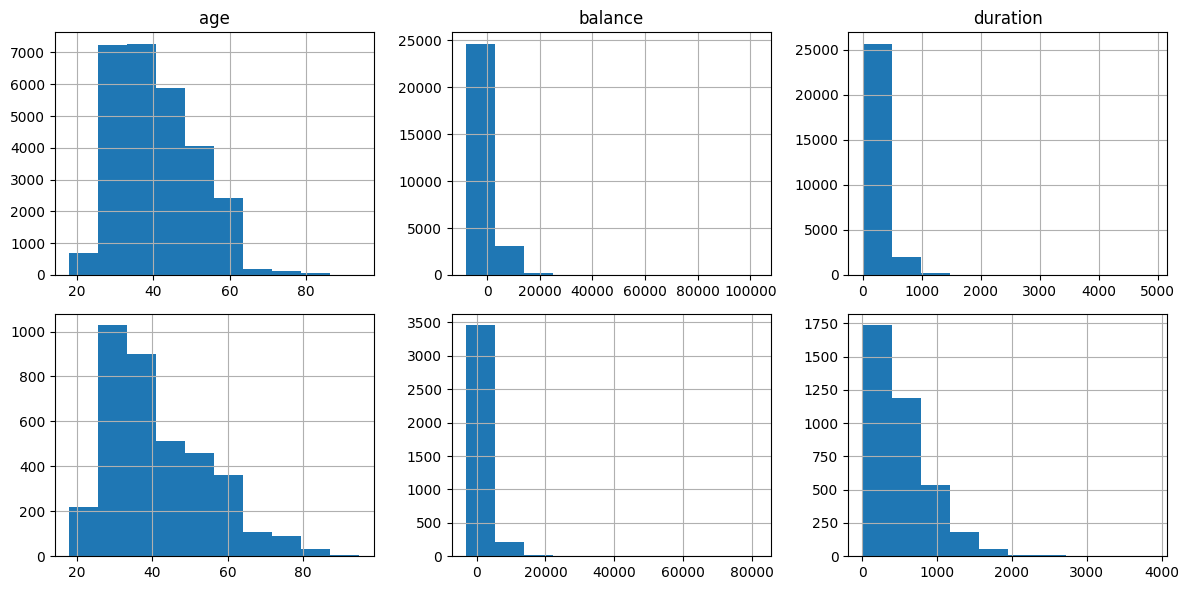

In [207]:
# Task 7
# Understand feature distributions - plot histogram of feature values for each class
# This will help you understand if the feature values overlap or not
# Ask ChatGPT: How does feature value overlap influence Logigisic Regression model


# TODO: Solution below, please remove
feats = num_cols
print(num_cols)
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, feat in enumerate(feats):
    row = i // 3
    col = i % 3
    train_df[train_df[label]==0][feat].hist(ax=axes[row, col])
    train_df[train_df[label]==1][feat].hist(ax=axes[row+1, col])
    axes[row, col].set_title(feat)

plt.tight_layout()
plt.show()


In [208]:
# Task 7.a
# Check if any pair of numeric features are correlated
# Since all features are continuous you can use pandas default correction (Pearson Corr) 

# Ask ChatGPT! : How do correlated feature impact performance of a Logistic Regression Model. 
# Knowing this - what should you do when you build the model?

def calc_corr_num(df: pd.DataFrame) -> None:
    '''
    Complete the function to calculate all pairwise correlation
    From the output Identify the pair of features that are highly correlated.
    '''
    
    # TODO: Solution below, please remove
    return df[num_cols].corr()


# Do not change this code
calc_corr_num(train_df[feats])


,age,balance,duration
age,1.000000,0.103245,-0.003870
balance,0.103245,1.000000,0.024274
duration,-0.003870,0.024274,1.000000


In [209]:
# Task 7.b
# Check if any pair of categorical features are correlated
# Since all features are categorical you can use Chi-Square


def calc_corr_cat(df: pd.DataFrame) -> None:
    '''
    Complete the function to calculate all pairwise correlation
    From the output Identify the pair of features that are highly correlated.
    '''

    # TODO: Solution below, please remove
    for feat1 in cat_cols[:-1]:
        for feat2 in cat_cols[1:]:

            # Create a contingency table
            contingency_table = pd.crosstab(df[feat1], df[feat2])

            # Perform the Chi-Square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            
            print(f"{feat1} {feat2} Chi-Square value: {chi2} P-value: {p_value}")


# Do not change this code
temp_df = pd.read_csv(data_folder + 'train.csv')
calc_corr_cat(temp_df)

# Ask ChatGPT: What is the downside of using p-values when doing multiple hypothesis testing?
# Ask ChatGPT: Is Chi-square reliable when fields have high cardinality
# - Based on this answer we will skip testing for relevance of categorical features


job marital Chi-Square value: 2641.9388654036907 P-value: 0.0
job education Chi-Square value: 20222.86940323427 P-value: 0.0
job default Chi-Square value: 40.15461938400166 P-value: 3.36607967649755e-05
job housing Chi-Square value: 2492.6734040893666 P-value: 0.0
job loan Chi-Square value: 336.1190673143631 P-value: 2.0898469002461418e-65
job contact Chi-Square value: 1454.707544605514 P-value: 1.506496453857499e-294
job month Chi-Square value: 4267.657182345193 P-value: 0.0
job day Chi-Square value: 1125.9169018783605 P-value: 1.6620628111240168e-87
job campaign Chi-Square value: 645.1805215079631 P-value: 1.194511053516988e-06
job pdays Chi-Square value: 6624.296319261513 P-value: 1.0128588851150648e-20
job previous Chi-Square value: 517.3803437019321 P-value: 0.00016621125367587331
job poutcome Chi-Square value: 397.60263197934626 P-value: 4.046433342325537e-64
marital marital Chi-Square value: 63294.0 P-value: 0.0
marital education Chi-Square value: 976.9100690635448 P-value: 8.81

In [210]:
# # Task 7.c
# # Check if pair of categorical - numeric features are correlated
# # For this you can use the F-test

# def calc_corr_cat_num(df: pd.DataFrame) -> None:
#     '''
#     Complete the function to calculate all pairwise correlation
#     From the output Identify the pair of features that are highly correlated.
#     '''
    
#     # TODO: Solution below, please remove
#     for feat1 in num_cols:
#         for feat2 in cat_cols:
#             groups = df.groupby(feat2)[feat1].apply(list)
#             f_statistic, p_value = f_oneway(*groups)

#             print(feat1, feat2, f_statistic, p_value)


# # Do not change this code
# calc_corr_cat_num(train_df)

# # Ask ChatGPT: Is F-test reliable when fields have high cardinality?
# # Based on this should we remove any feature that high association?


In [211]:
# Task 8
# Check which of the numeric feature are predictive (i.e. will a donor donate blood)
# For this you can used a specific statistical test called 'Welch's t-test'
# Which of the feature are not predictive assuming significance alpha = 0.01

# Ask ChatGPT:  What is welch's t-test, and t-test - how does it help determing important features.

def run_student_ttest(df, col) -> tuple[str, float]:
    '''
    Write a function to return p-values from the Welch's t-test
    for feature passed into the function
    '''

    # TODO: Solution below, please remove
    t_stat, p_val = stats.ttest_ind(df[df[label]==0][col], df[df[label]==1][col], 
                                        equal_var=False)  # Welch's t-test
    
    print(col, t_stat, p_val)


for feat in num_cols:
    run_student_ttest(train_df, feat)

age -3.555600790888907 0.0003811691010387318
balance -8.113988942366467 6.267048565195971e-16
duration -47.87002037184109 0.0


In [212]:
# # Task 8.b
# # Check which of the categorical feature are predictive (i.e. will a donor donate blood)
# # For this you can used a specific statistical test called 'Chi-sqaure test'
# # Which of the feature are not predictive assuming significance alpha = 0.01

# def run_chi_test(df, col) -> tuple[str, float]:
#     '''
#     Write a function to return p-values from the Welch's t-test
#     for feature passed into the function
#     '''

#     # Create a contingency table
#     contingency_table = pd.crosstab(df[col], df[label])

#     # Perform the Chi-Square test
#     chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
#     print(f"{col} {label} Chi-Square value: {chi2} P-value: {p_value}")

# for feat in cat_cols:
#     run_chi_test(train_df, feat)

## Understanding Classification Metrics

The most common classification metrics are - 
* Accuraccy
* Precision
* Recall
* F1-Score
Let's Ask ChatGPT what there are - <br>


Now having analyzed the data (from Task 1), choose the best metrics for your task. <br>
<br>

Assume you got the following information from business - 
* If you prediction someone is going to subscribe, but they dont - this is huge concern. You want to reduce such `false positives` as much as possible.
* If you predict someone is not going to subscribe, and they do - it is ok.

Knowing the above - decide which metric to use. <br>
Irrespective of what you use evaluate performance using F1 as well.

In [213]:
# Task 11
# Write the function to calucate the metric you have chosen

def calc_perf(y_act: list, y_pred: list) -> float:
    '''
    Compelete this function to calculate the metric
    you have chosen
    '''

    # TODO: Solution below, pleas remove
    val = precision_score(y_act, y_pred)
    return val

## Training the Model

Now, finally we can start training the model. When training an ML model its important to have three datasets
* Train dataset - which you use to train the model and learn parameter
* Validation dataset - the dataset to use to figure out which parameter are the best
* Test dataset - the hidden dataset, that you DO NOT look at. Its only use to estimate the performance in future unseen datasets.

Lets start by creating these datasets - 
1. Load the train dataset 
2. ONLY run the de-duplication function on train set (lets see what performance we get without outlier removal and feature engineering)
3. Split train dataset 80:20 to creatin a new train dataset and validation set
2. Load the test dataset

In [214]:
# Task 12
# Preproces the train data to create traininig and validation data


def create_dataset(df: pd.DataFrame) -> tuple[np.array, np.array, np. array, np.array]:
    '''
    Remove duplicate data from train file alone 
    Encode the categorical values
    Split train file data into train and valid set (keep in mind what we about imbalance learned in Task 5)
        Hint use: train_test_split (set seed to 100), and use the `stratify` field
        Ask ChatGPT: Why is it important to stratify when creating training and validation sets for imbalanced datasets
    
    Return np. arrays for train features, train labels, valid features, valid labels, feature names

    '''

    # TODO: Solution below, pleas remove
    df = remove_duplicates(df)
    df = encode_cat(df, train=True)

    feats = list(df.columns)
    feats.remove(label)
    feats.remove('ID')

    X = df[feats].values
    y = df[label].values

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, 
                                                          stratify=y, random_state=100)

    return X_train, y_train, X_valid, y_valid, feats


# Do not change this
X_train, y_train, X_valid, y_valid, feats = create_dataset(pd.read_csv(data_folder + 'train.csv'))

Now, lets build a logicstic regression model. Extract out the features and labels from train dataset.

In [215]:
# Task 13
# Train a basline Logisitc Regression model with default parameters

def train_base(X_train: np.array, y_train: np.array) -> LogisticRegression:
    '''
    Complete this function to
    Train a baseline LogisticRegression Model with default parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove
    model = LogisticRegression(random_state=100)
    model.fit(X_train, y_train)

    return model


# Do not change this
model = train_base(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Train Performance
Selected Metric:  0.6470588235294118 F1-Score:  0.4462081128747795


Validation Performance
Selected Metric:  0.6426858513189448 F1-Score:  0.46206896551724136


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Improving baseline Model

In [216]:
# Task 14
# Now lets try fixing the imbalance we saw in task 5 - Does it improve performance?

def rebalance_df(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Write a function to 
    (a) remove duplicate rows in data
    (b) balance the number of positive and negative samples in train_data
    Hint: Use downsampling, use random_state = 100
    Hint: Dont forget to reset index after creating a new dataframe

    Return balance dataframe
    '''

    # TODO: Solution below, please remove
    df = remove_duplicates(df)

    pos_df = df[df[label] == 'yes']
    neg_df = df[df[label] == 'no']

    df = pd.concat([neg_df.sample(frac=0.4, random_state=100), pos_df]).reset_index(drop=True)
    return df


# Do not change the following code
# load the data
train_df = pd.read_csv(data_folder + 'train.csv')
print(train_df.shape, train_df[label].value_counts(normalize=True))

print("\n\n")

# balance the data
train_df = rebalance_df(train_df)
print("Balanced", train_df.shape, train_df[label].value_counts(normalize=True))

# check the performance with rebalance dataset
print("\n\n")
X_train, y_train, X_valid, y_valid, feats = create_dataset(train_df)
model = train_base(X_train, y_train)
print(X_train.shape)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

(31647, 18) subscribed
no     0.882611
yes    0.117389
Name: proportion, dtype: float64



Balanced (14888, 18) subscribed
no     0.75047
yes    0.24953
Name: proportion, dtype: float64



(11910, 616)
Train Performance
Selected Metric:  0.7563291139240507 F1-Score:  0.6454475308641975


Validation Performance
Selected Metric:  0.7238938053097345 F1-Score:  0.6253822629969419


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [217]:
# Task 15
# Another way to combat data imbalance is comfiguring class weights in the Logistic Regression model 

def train_tune_model(X_train: np.array, y_train: np.array):
    '''
    Write the function to train a Logistic Regression model
    and use `class_weight` parameter
    Use random_state = 100 to keep results consistent
    '''

    # TODO: Solution below, please remove code
    model = LogisticRegression(class_weight={0:0.25, 1:0.75 }, random_state=100)
    model.fit(X_train, y_train)

    return model


# do no change the following code
train_df = pd.read_csv(data_folder + 'train.csv')
X_train, y_train, X_valid, y_valid, feats = create_dataset(train_df)

model = train_tune_model(X_train, y_train)

pred = model.predict(X_train)
print("Train Performance")
print("Selected Metric: ", calc_perf(y_train, pred), "F1-Score: ", f1_score(y_train, pred))

print("\n")

pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))


# Ask ChatGPT: Why does one of the methods perform better than the other
# Hint: It could be related to the how the feature distribution for both class overlap as seen in Task 6

Train Performance
Selected Metric:  0.5272938443670151 F1-Score:  0.5660847880299252


Validation Performance
Selected Metric:  0.5165094339622641 F1-Score:  0.5505971087366436


/opt/anaconda3/envs/ads/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
# Task 17
# Nomrmalizing features to see how it impact perforamance


def train_tune_model(X_train: np.array, y_train: np.array, 
                     scaler):
    '''
    Complete this function to normalize features 
    X_train: is the train features values
    y_train: is train labels
    scaler: The scaler you have chosen

    Bonus [Optional] Task : 
    Fine-tune the Logistic Regression Model.
    Some of the parameters you may want to experiment with are - solver, penatly and C
    '''

    # Hint: Use StandardScaler to normalize features
    # Ask ChatGPT what type of feature scaling is best for Logistic Regression and why

    # TODO: Solution below, remove this code
    X_train = scaler.fit_transform(X_train)

    model = LogisticRegression(solver = 'liblinear', penalty='l1', C=0.5)
    model.fit(X_train, y_train)

    return (model, scaler)

scaler = StandardScaler()

# Do not change this code
train_df = pd.read_csv(data_folder + "train.csv")
train_df = rebalance_df(train_df)
# train_df = drop_feature(train_df, cols = ['Total Volume Donated (c.c.)'])

X_train, y_train, X_valid, y_valid, feats = create_dataset(train_df)
model, scaler = train_tune_model(X_train, y_train, scaler)

X_valid = scaler.transform(X_valid) # we use the same scaler you have used earlier
pred = model.predict(X_valid)
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))

Validation Performance
Selected Metric:  0.7308319738988581 F1-Score:  0.6607669616519174


In [219]:
# Task 18
# Understand the coefficient from the Logistic Regression model

def get_model_coeff(model : LogisticRegression, feats: list):
    '''
    Complete this function to print pair of values
    (feature name, coeff value)
    '''

    # TODO: Remove this code
    coeffs = list(model.coef_)[0]
    print(coeffs)

    for i in range(len(feats)):
        print(feats[i], coeffs[i])
    
    print("Intercept", model.intercept_)


get_model_coeff(model, feats)

# Ask ChatGPT: How do you interpret coeffcient of a Logistic Regression model

[-3.82024323e-03  3.41618259e-02  1.55540831e+00  7.39566831e-02
 -6.18792787e-02  1.62621005e-04 -3.95198320e-02  8.26487558e-03
  9.86569411e-02 -3.52651943e-02 -2.32153504e-02  9.64276965e-02
  0.00000000e+00 -5.34873349e-02  6.59817339e-03  3.44775821e-03
 -1.39989545e-01  0.00000000e+00 -3.47340062e-02  0.00000000e+00
  1.23571983e-01  1.94356285e-02 -2.67936298e-02  0.00000000e+00
  2.95994706e-01 -1.82234676e-03  1.60605059e-01 -3.72935828e-02
  9.15415280e-02  0.00000000e+00 -6.74162313e-01  2.07422506e-01
 -6.19305825e-02  1.34922435e-01  1.12014098e-01 -1.01740889e-01
 -2.27894736e-01  2.76798129e-01  3.14216316e-01  0.00000000e+00
 -3.93176028e-02  2.49842519e-01  1.86446447e-01  1.39821956e-02
 -1.96359445e-03  3.08043036e-02 -7.07197221e-02 -6.36313081e-02
 -5.53093842e-02 -1.87539047e-02  1.81015558e-02  0.00000000e+00
  1.21880008e-02  0.00000000e+00  6.07973642e-02  4.98169779e-02
  2.65323381e-02  4.05637424e-02  5.96679474e-02 -1.35739082e-01
 -1.84633232e-02 -1.53380

In [233]:
# Task 19
# Error Analysis - This is crucial to identify what went wrong and how it could be improved
actual = y_valid
pred = model.predict(X_valid)

# Use a confusion matrix to figure out if the model is making more false positive or false negative
# TODO: Remove code below
tn, fp, fn, tp = confusion_matrix(actual, pred).ravel()
print(tn, fp, fn, tp)

# Identfiy if certain subset of data is more subsceptible to error (like certain jobs, durations etc)

# TODO: Remove this comment, This is an open-ended task, so no validation would be needed


# Based on the above insights figure out how the model could be improved
# Think first - feature engineering, then improve Log.Reg fitting, and then experimenting with other models 
# Do not jump to trying out other models directly, this is not standard industry practice - open ended task


# TODO: Remove this comment, This is an open-ended task, so no validation would be needed

2070 165 295 448


In [236]:
# Task 20
# Try-out other models, here we will be experimenting with RFClassifier
# However its common in the industry to decide to spend 2-3 days on model experimentation
# During this time you can experiment with as many models, fine-tuning techniques as possible

# TODO: Remove code below
from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv(data_folder + "train.csv")
train_df = rebalance_df(train_df)

X_train, y_train, X_valid, y_valid, feats = create_dataset(train_df)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_valid)

# Evaluate the model
print("Validation Performance")
print("Selected Metric: ", calc_perf(y_valid, pred),"F1-Score: ", f1_score(y_valid, pred))


Validation Performance
Selected Metric:  0.7655038759689923 F1-Score:  0.6274821286735505


In [230]:
# Task 21
# Finally apply all the transformation you deem best on the data and the best model you found to get prediction on test datasets

test_df = pd.read_csv(data_folder + 'test.csv')

# TODO: Remove Solution below
test_df = encode_cat(test_df, train=False)
test_df = test_df.drop(columns=['ID'])
test_arr = scaler.transform(test_df.values)
pred = model.predict(test_arr)
print(pred)

[0 0 0 ... 0 1 0]
